## Regressão com o Conjunto de Dados da Habitação da Califórnia

Utilização do conjunto de dados de habitação na Califórnia com o objetivo de explorar problemas de regressão.

In [1]:
from sklearn.datasets import fetch_california_housing
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Carregar o conjunto de dados da habitação da Califórnia
california_data = fetch_california_housing()
california_df = pd.DataFrame(data=california_data.data, columns=california_data.feature_names)
california_df['MedHouseValue'] = california_data.target

# Exibir as primeiras linhas do dataframe
california_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseValue
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


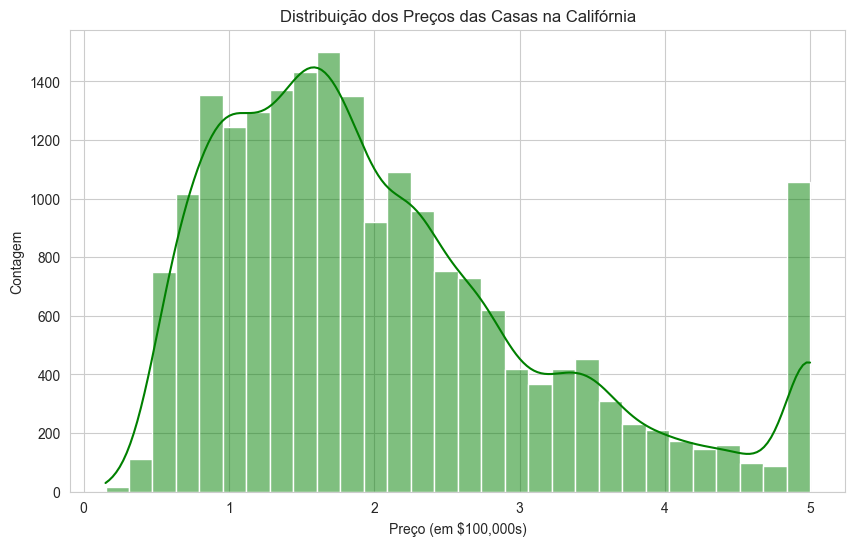

In [10]:
# Visualizar a distribuição dos preços das casas (MedHouseValue)
plt.figure(figsize=(10, 6))
sns.histplot(california_df['MedHouseValue'], bins=30, kde=True, color='green')
plt.title('Distribuição dos Preços das Casas na Califórnia')
plt.xlabel('Preço (em $100,000s)')
plt.ylabel('Contagem')
plt.show()

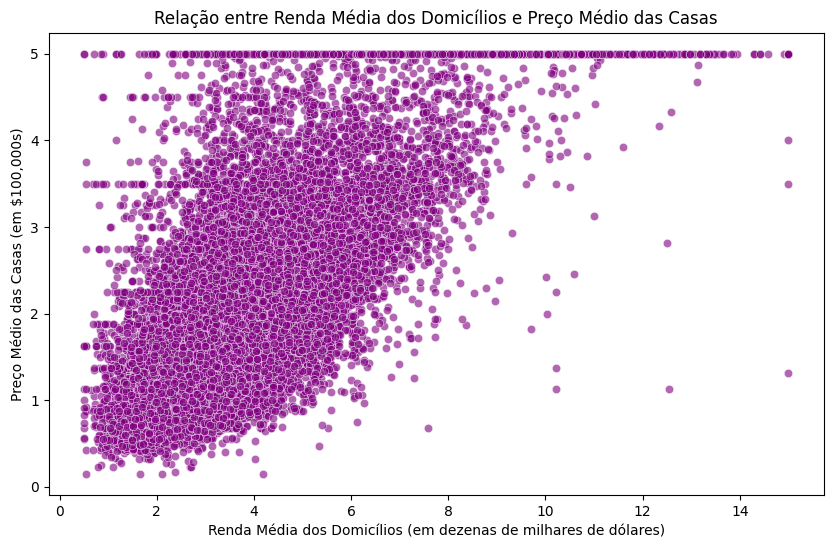

In [4]:
# Visualizar a relação entre a renda média dos domicílios (MedInc) e o preço médio das casas (MedHouseValue)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=california_df['MedInc'], y=california_df['MedHouseValue'], color='purple', alpha=0.6)
plt.title('Relação entre Renda Média dos Domicílios e Preço Médio das Casas')
plt.xlabel('Renda Média dos Domicílios (em dezenas de milhares de dólares)')
plt.ylabel('Preço Médio das Casas (em $100,000s)')
plt.show()

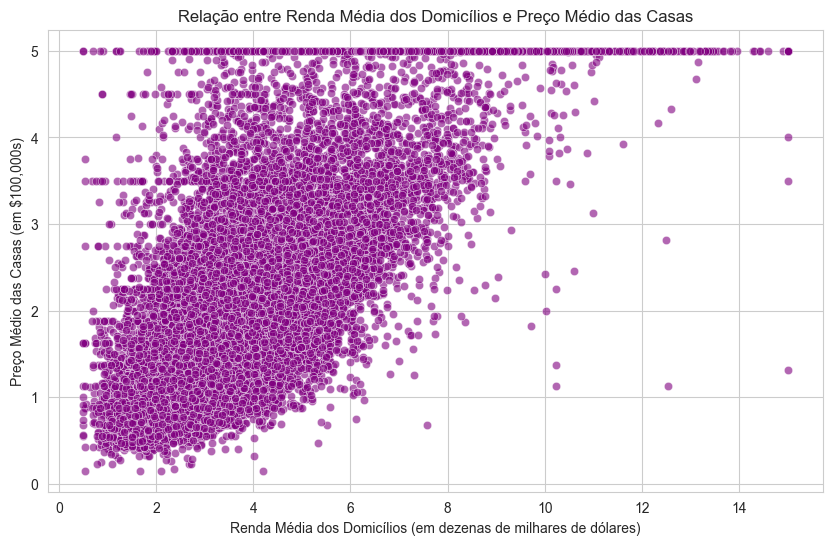

In [5]:

# Configurar o estilo dos gráficos
sns.set_style('whitegrid')

# Visualizar a relação entre a renda média dos domicílios (MedInc) e o preço médio das casas (MedHouseValue)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=california_df['MedInc'], y=california_df['MedHouseValue'], color='purple', alpha=0.6)
plt.title('Relação entre Renda Média dos Domicílios e Preço Médio das Casas')
plt.xlabel('Renda Média dos Domicílios (em dezenas de milhares de dólares)')
plt.ylabel('Preço Médio das Casas (em $100,000s)')
plt.show()

## Preparação dos Dados para Modelagem

Antes de prosseguir para a modelagem, é crucial preparar os dados. Vamos abordar as seguintes etapas:

1. **Limpeza de Dados:** Verificar se há valores ausentes ou outliers e lidar com eles.
2. **Transformação de Características:** Normalizar ou padronizar as variáveis, se necessário.
3. **Divisão de Dados:** Dividir o conjunto de dados em conjuntos de treinamento e teste.

In [6]:
# 1. Limpeza de Dados: Verificar se há valores ausentes
missing_values = california_df.isnull().sum()
missing_values

MedInc           0
HouseAge         0
AveRooms         0
AveBedrms        0
Population       0
AveOccup         0
Latitude         0
Longitude        0
MedHouseValue    0
dtype: int64

In [7]:
# 2. Transformação de Características: Normalização das variáveis
from sklearn.preprocessing import StandardScaler

# Separar as características (features) e o alvo (target)
X = california_df.drop('MedHouseValue', axis=1)
y = california_df['MedHouseValue']

# Criar o objeto StandardScaler do scikit-learn para criar um objeto que fará a padronização.
scaler = StandardScaler()

# Ajustar e transformar as características
X_scaled = scaler.fit_transform(X)

# Mostrar as primeiras 5 linhas das características transformadas
X_scaled[:5, :]

array([[ 2.34476576,  0.98214266,  0.62855945, -0.15375759, -0.9744286 ,
        -0.04959654,  1.05254828, -1.32783522],
       [ 2.33223796, -0.60701891,  0.32704136, -0.26333577,  0.86143887,
        -0.09251223,  1.04318455, -1.32284391],
       [ 1.7826994 ,  1.85618152,  1.15562047, -0.04901636, -0.82077735,
        -0.02584253,  1.03850269, -1.33282653],
       [ 0.93296751,  1.85618152,  0.15696608, -0.04983292, -0.76602806,
        -0.0503293 ,  1.03850269, -1.33781784],
       [-0.012881  ,  1.85618152,  0.3447108 , -0.03290586, -0.75984669,
        -0.08561576,  1.03850269, -1.33781784]])

In [8]:
# 3. Divisão de Dados: Conjuntos de Treinamento e Teste
from sklearn.model_selection import train_test_split

# Dividir os dados em 70% treinamento e 30% teste
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Mostrar o tamanho dos conjuntos de treinamento e teste
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((14448, 8), (6192, 8), (14448,), (6192,))

## Modelagem de Machine Learning

Agora que nossos dados estão preparados, podemos prosseguir para a modelagem. Vamos começar com um modelo de Regressão Linear para prever o preço médio das casas na Califórnia. As etapas incluem:

1. **Criação do Modelo:** Utilizar a classe `LinearRegression` do scikit-learn para criar o modelo.
2. **Treinamento do Modelo:** Utilizar o conjunto de treinamento para treinar o modelo.
3. **Avaliação do Modelo:** Utilizar métricas como RMSE (Root Mean Square Error) para avaliar o desempenho do modelo no conjunto de teste.

In [11]:
# 1. Criação do Modelo: Utilizar a classe LinearRegression do scikit-learn
from sklearn.linear_model import LinearRegression

# Criar o objeto do modelo de Regressão Linear
linear_model = LinearRegression()

# 2. Treinamento do Modelo: Utilizar o conjunto de treinamento para treinar o modelo
linear_model.fit(X_train, y_train)

# 3. Avaliação do Modelo: Prever os valores no conjunto de teste
y_pred = linear_model.predict(X_test)

# Mostrar as primeiras 5 previsões
y_pred[:5]

array([0.72604907, 1.76743383, 2.71092161, 2.83514727, 2.60695807])

In [12]:
# 4. Avaliação do Modelo: Utilizar métricas como RMSE para avaliar o desempenho
from sklearn.metrics import mean_squared_error
import numpy as np

# Calcular o RMSE (Root Mean Square Error)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rmse

0.7284008391515453

O valor do RMSE (Root Mean Square Error) de aproximadamente 0.73 indica que o modelo tem um certo nível de erro nas previsões. Em geral, um RMSE mais baixo é preferível, pois indica que o modelo faz previsões mais precisas. Vamos prosseguir para tentar diminuir o valor do RMSE.

## Engenharia de Características

Vamos tentar criar algumas novas características para melhorar o desempenho do nosso modelo. Algumas ideias incluem:

1. **Renda per Capita:** Podemos dividir a renda média pelo número médio de pessoas por domicílio.
2. **Quartos por Domicílio:** Podemos dividir o número total de quartos pelo número total de domicílios.
3. **População por Domicílio:** Podemos dividir a população total pelo número total de domicílios.

In [13]:
# Criar novas características
california_df['income_per_capita'] = california_df['MedInc'] / california_df['AveOccup']
california_df['rooms_per_household'] = california_df['AveRooms'] / california_df['HouseAge']
california_df['population_per_household'] = california_df['Population'] / california_df['HouseAge']

# Mostrar as primeiras 5 linhas para verificar as novas características
california_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseValue,income_per_capita,rooms_per_household,population_per_household
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526,3.257687,0.170345,7.853659
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585,3.934608,0.297054,114.333333
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521,2.589838,0.159387,9.538462
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413,2.214765,0.111872,10.730769
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422,1.763125,0.120805,10.865385


## Treinamento do Modelo com Novas Características

Agora que adicionamos novas características ao nosso conjunto de dados, vamos treinar o modelo de Regressão Linear novamente e avaliar seu desempenho.

In [15]:
# Separar as características e a variável alvo novamente com as novas características
X_new = california_df.drop('MedHouseValue', axis=1)
y_new = california_df['MedHouseValue']

# Dividir os dados em conjuntos de treinamento e teste novamente
from sklearn.model_selection import train_test_split
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, y_new, test_size=0.3, random_state=42)

# Treinar o modelo de Regressão Linear novamente
from sklearn.linear_model import LinearRegression
linear_model_new = LinearRegression()
linear_model_new.fit(X_train_new, y_train_new)

# Fazer previsões com o novo modelo
y_pred_new = linear_model_new.predict(X_test_new)

# Calcular o novo RMSE
from sklearn.metrics import mean_squared_error
import numpy as np
rmse_new = np.sqrt(mean_squared_error(y_test_new, y_pred_new))
rmse_new

0.6622569956571444